In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/seoul-bike-rental-ai-pro-iti/sample_submission.csv
/kaggle/input/seoul-bike-rental-ai-pro-iti/train.csv
/kaggle/input/seoul-bike-rental-ai-pro-iti/test.csv


# <center>reading datasets

In [2]:
raw_train = pd.read_csv('/kaggle/input/seoul-bike-rental-ai-pro-iti/train.csv' , index_col='ID')
raw_test = pd.read_csv('/kaggle/input/seoul-bike-rental-ai-pro-iti/test.csv'  , index_col='ID')
print(f"train set size : {raw_train.shape} \ntest set size : {raw_test.shape}")

train set size : (5760, 14) 
test set size : (3000, 13)


In [3]:
raw_train.head(5)

,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
ID,,,,,,,,,,,,,,
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       5760 non-null   object 
 1   y                          5760 non-null   int64  
 2   Hour                       5760 non-null   int64  
 3   Temperature(�C)            5760 non-null   float64
 4   Humidity(%)                5760 non-null   int64  
 5   Wind speed (m/s)           5760 non-null   float64
 6   Visibility (10m)           5760 non-null   int64  
 7   Dew point temperature(�C)  5760 non-null   float64
 8   Solar Radiation (MJ/m2)    5760 non-null   float64
 9   Rainfall(mm)               5760 non-null   float64
 10  Snowfall (cm)              5760 non-null   float64
 11  Seasons                    5760 non-null   object 
 12  Holiday                    5760 non-null   object 
 13  Functioning Day            5760 non-null   objec

# <center> extracting data from date time col

In [5]:
from sklearn.base import TransformerMixin , BaseEstimator
from datetime import datetime
class TSSplit(BaseEstimator , TransformerMixin):
    def __init__(self , format_str , out_col = ['year' , 'month' , 'day' , 'hour' , 'minute' , 'sec' , 'dayname' , 'dayNUM' , 'isweekend' , 'DayNight' , 'week_num'] , weed_end_days = ['Saturday' ,'Sunday'] , morning_interval = (6 , 17)):
        self.format_str    = format_str
        self.out_col       = out_col
        self.weed_end_days = weed_end_days
        self.morning_interval = morning_interval
    
    def fit(self , X , y=None):
        return self
    
    def columns(self):
        return self.out_col
    
    def transform(self , X):
        col = X.copy().values
        dict = {}
        
        for i in self.out_col:
            if i == 'day'      : dict['day'       ] = np.array([datetime.strptime(i[0], self.format_str).day                                  for i in col] ).reshape(-1,1)
            if i == 'year'     : dict['year'      ] = np.array([datetime.strptime(i[0], self.format_str).year                                 for i in col] ).reshape(-1,1)
            if i == 'month'    : dict['month'     ] = np.array([datetime.strptime(i[0], self.format_str).month                                for i in col] ).reshape(-1,1)
            if i == 'hour'     : dict['hour'      ] = np.array([datetime.strptime(i[0], self.format_str).hour                                 for i in col] ).reshape(-1,1)
            if i == 'minute'   : dict['minute'    ] = np.array([datetime.strptime(i[0], self.format_str).minute                               for i in col] ).reshape(-1,1)
            if i == 'sec'      : dict['sec'       ] = np.array([datetime.strptime(i[0], self.format_str).second                               for i in col] ).reshape(-1,1)
            if i == 'dayname'  : dict['dayname'   ] = np.array([datetime.strptime(i[0], self.format_str).strftime("%A")                       for i in col] ).reshape(-1,1)
            if i == 'dayNUM'   : dict['dayNUM'    ] = np.array([datetime.strptime(i[0], self.format_str).isoweekday()                         for i in col] ).reshape(-1,1)
            if i == 'isweekend': dict['isweekend' ] = np.array([datetime.strptime(i[0], self.format_str).strftime("%A") in self.weed_end_days for i in col] ).astype(int).reshape(-1,1)
            if i == 'DayNight' : dict['DayNight'  ] = np.array(
                [
                    (datetime.strptime(i[0], self.format_str).hour > self.morning_interval[0]) and
                    (datetime.strptime(i[0], self.format_str).hour < self.morning_interval[1]) for i in col
                ] 
            ).astype(int).reshape(-1,1)
            if i == 'week_num'      : dict['week_num'       ] = np.array([datetime.strptime(i[0], self.format_str).strftime("%V")                       for i in col] ).astype(int).reshape(-1,1)
        
        out_list = []
        
        for i in self.out_col:
            out_list.append(dict[i])
        return np.concatenate(out_list , axis=1)

In [6]:
# exmple
from sklearn.compose import ColumnTransformer

obj = TSSplit(format_str='%d/%m/%Y' , out_col = ['month','year' , 'day' , 'dayNUM' , 'isweekend' ,  'week_num'] , weed_end_days = ['Saturday' ,'Sunday'] , morning_interval = (6 , 17))

train_out = obj.fit_transform(raw_train)
date_transformation_train = pd.DataFrame(train_out , columns=obj.columns())

test_out = obj.fit_transform(raw_test)
date_transformation_test = pd.DataFrame(test_out , columns=obj.columns())
date_transformation_test = date_transformation_test.set_index(raw_test.index)

train = pd.concat( [raw_train.drop(['Date'] , axis = 1) , date_transformation_train] , axis = 1)
test = pd.concat( [raw_test.drop(['Date'] , axis = 1) , date_transformation_test] , axis = 1 )

<AxesSubplot:xlabel='DayNight', ylabel='Count'>

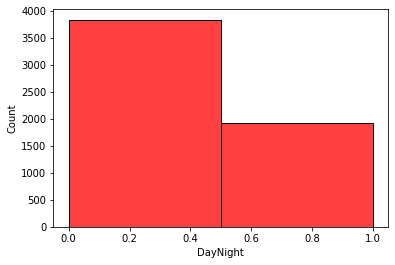

In [7]:
train['DayNight'] = np.array([( i > 11) and (i < 20)  for i in train.Hour]).astype(int).reshape(-1,1) 
test['DayNight'] = np.array([( i > 11) and (i < 20)  for i in test.Hour]).astype(int).reshape(-1,1) 
sns.histplot(train['DayNight'] , binwidth = 0.5 ,  color = 'r')

In [8]:
train.head(5)

,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,day,dayNUM,isweekend,week_num,DayNight
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1,5,0,48,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1,5,0,48,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1,5,0,48,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1,5,0,48,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1,5,0,48,0


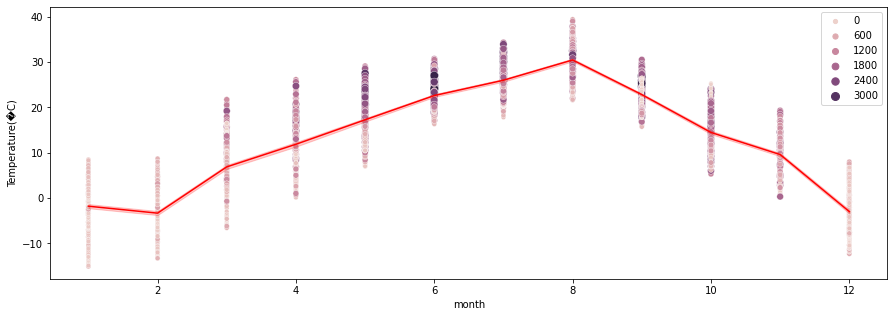

In [9]:
plt.figure(figsize=(15,5))
# sns.set_style("darkgrid")
sns.scatterplot(data=train, x="month", y='Temperature(�C)' , hue='y' , size='y');
sns.lineplot(data = train , x = 'month' , y = 'Temperature(�C)' , color='red')
plt.show()

<Figure size 1080x360 with 0 Axes>

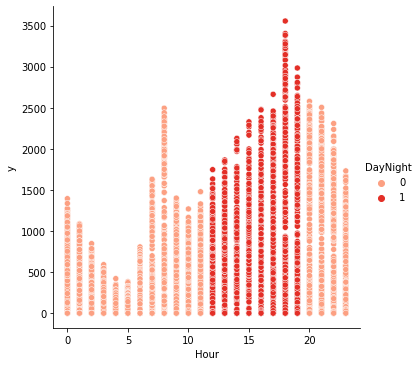

In [10]:
plt.figure(figsize=(15,5));
sns.relplot(data = train , x = 'Hour' , y = 'y' ,  hue='DayNight' , palette = 'Reds');

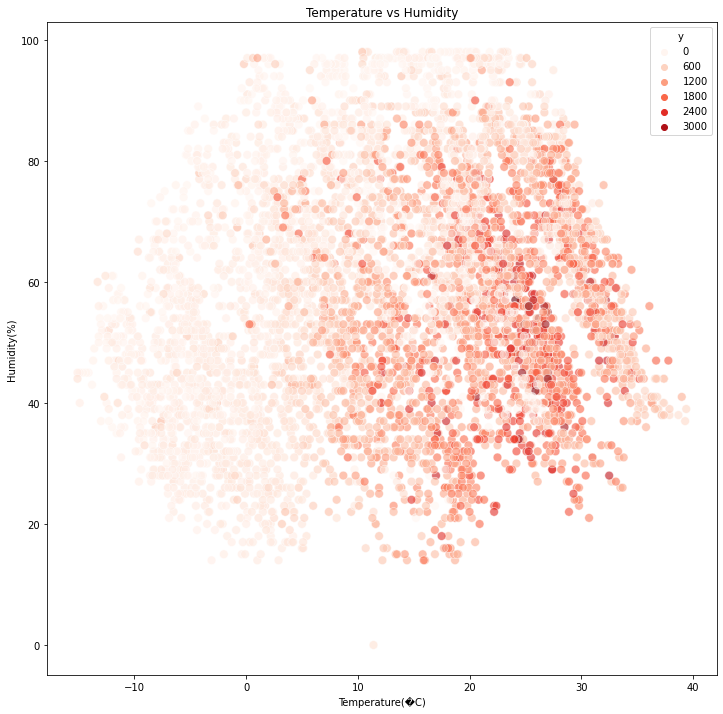

In [11]:
# Plot for Temperature & Humidity by Summary
plt.figure(figsize=(12,12))
plt.title('Temperature vs Humidity')
sns.scatterplot(
    data    = train ,
    x       = 'Temperature(�C)',
    y       = 'Humidity(%)',
    hue     = 'y', 
    palette = 'Reds',
    s       = 75 , 
    alpha   = 0.6)
plt.show()

# <center> transform some columns

In [12]:
train['Solar Radiation (MJ/m2)'] = np.log(train['Solar Radiation (MJ/m2)']+1)
test['Solar Radiation (MJ/m2)'] = np.log(test['Solar Radiation (MJ/m2)']+1)

train['Visibility (10m)'] = train['Visibility (10m)'] /2000
test['Visibility (10m)'] = test['Visibility (10m)'] / 2000

data = train['Humidity(%)'] ; train['Humidity(%)'] = (data - data.min()) / (data.max() - data.min())
data = test['Humidity(%)']  ; test['Humidity(%)'] = (data - data.min()) / (data.max() - data.min())

data = train['Rainfall(mm)'] ; train['Rainfall(mm)'] = (data - data.min()) / (data.max() - data.min())
data = test['Rainfall(mm)'] ; test['Rainfall(mm)'] = (data - data.min()) / (data.max() - data.min())

data = train['Snowfall (cm)'] ; train['Snowfall (cm)'] = (data - data.min()) / (data.max() - data.min())
data = test['Snowfall (cm)'] ; test['Snowfall (cm)'] = (data - data.min()) / (data.max() - data.min())


<AxesSubplot:xlabel='Snowfall (cm)', ylabel='Count'>

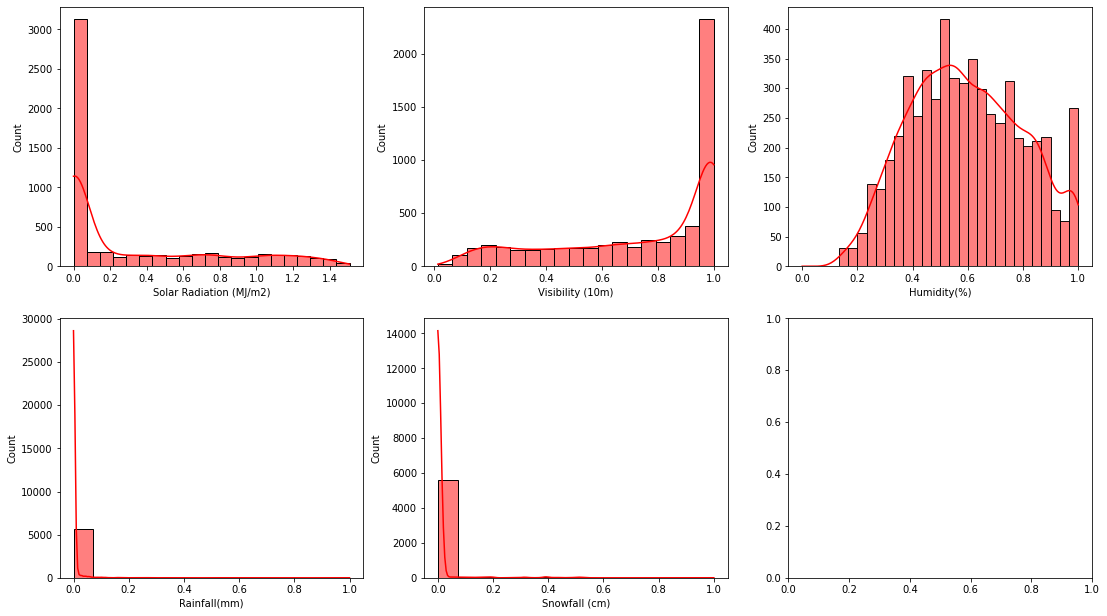

In [13]:
fig , ax  = plt.subplots(2 , 3)
fig.set_size_inches(18.5, 10.5)
sns.histplot(train['Solar Radiation (MJ/m2)'] , color = 'r' , kde = True , ax = ax[0,0])
sns.histplot(train['Visibility (10m)'] , color = 'r' , kde = True , ax = ax[0,1])
sns.histplot(train['Humidity(%)'] , color = 'r' , kde = True , ax = ax[0,2])
sns.histplot(train['Rainfall(mm)'] , color = 'r' , kde = True , ax = ax[1,0])
sns.histplot(train['Snowfall (cm)'] , color = 'r' , kde = True , ax = ax[1,1])

# <center> group similar weather conditions togeather

In [14]:
from sklearn.base import TransformerMixin , BaseEstimator
from sklearn.cluster import DBSCAN , KMeans 

from datetime import datetime

class LablizeGroup(BaseEstimator , TransformerMixin):
    def __init__(self  , df , columns , K = 5 ):
        self.K    = K
        self.df  = df
        self.columns = columns
    
    def fit(self , X=None , y=None):
        self.clustrer = KMeans(n_clusters = self.K , random_state=42)
        return self
        
    def getLablesFromTest(self , test_df):
        data_to_get_label = test_df[self.columns]
        labels = self.clustrer.predict(data_to_get_label)
        return pd.DataFrame(labels , columns=['lables'])
    
    def transform(self , X):
        data_to_cluster = self.df[self.columns]
        labels          = self.clustrer.fit_predict(data_to_cluster)
        return pd.DataFrame(self.clustrer.labels_ , columns=['lables'])

In [15]:
LablizeGroup_obj = LablizeGroup(
    train , 
    ['Temperature(�C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'] , 
    K = 7
)
res2 = LablizeGroup_obj.fit_transform(train)
labels = pd.DataFrame(res2)
labled_train = pd.concat([train , labels] , axis  = 1)

In [16]:
LablizeGroup_obj 
res2 = LablizeGroup_obj.getLablesFromTest(test)
labels = pd.DataFrame(res2 )
labels = labels.set_index(test.index)
labled_test = pd.concat([test , labels] , axis  = 1)

<AxesSubplot:xlabel='lables', ylabel='Count'>

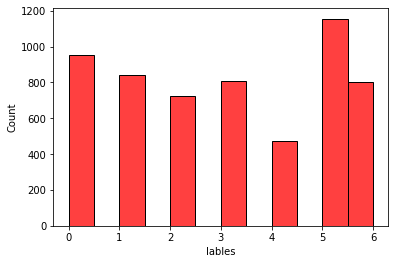

In [17]:
sns.histplot(labled_train.lables , binwidth = 0.5 ,  color = 'r')

# <center> get mean number of bikes for diffrent weather condition

In [18]:
modified = labled_train.copy()

modified['Temperature(�C)'          ] = np.abs  (np.round(np.log(modified['Temperature(�C)' ] +20 ))).astype(int)
modified['Humidity(%)'              ] = np.round(np.log(modified['Humidity(%)'              ] +1  )).astype(int)
modified['Wind speed (m/s)'         ] = np.round(np.log(modified['Wind speed (m/s)'         ] +1  )).astype(int)
modified['Visibility (10m)'         ] = np.round(np.log(modified['Visibility (10m)'         ] +1  )).astype(int)
modified['Dew point temperature(�C)'] = np.round(np.log(modified['Dew point temperature(�C)'] +28 )).astype(int)
modified['Solar Radiation (MJ/m2)'  ] = np.round(np.log(modified['Solar Radiation (MJ/m2)'  ] +1  )).astype(int)
modified['Rainfall(mm)'             ] = np.round(np.log(modified['Rainfall(mm)'             ] +1  )).astype(int)
modified['Snowfall (cm)'            ] = np.round(np.log(modified['Snowfall (cm)'            ] +1  )).astype(int)

modified['count'] = modified['y']
modified

g = modified.groupby(
    ['Temperature(�C)','Humidity(%)',
     'Visibility (10m)','Dew point temperature(�C)',
     'Solar Radiation (MJ/m2)','Rainfall(mm)',
     'Snowfall (cm)','month'
    ])['y'].agg(np.mean)

g = pd.DataFrame(g).reset_index()
g['y'] = g['y'].astype(int)

modified = modified.merge(g , 
               on = ['Temperature(�C)','Humidity(%)',
                     'Visibility (10m)','Dew point temperature(�C)',
                     'Solar Radiation (MJ/m2)','Rainfall(mm)',
                     'Snowfall (cm)','month'] ,
               suffixes=('', '_modified') ,how='left')

grouped_train = pd.concat([labled_train , modified['y_modified']] , axis = 1)

In [19]:

modified_t = labled_test.copy()

modified_t['Temperature(�C)'          ] = np.abs  (np.round(np.log(modified_t['Temperature(�C)' ] +20 ) )).astype(int)
modified_t['Humidity(%)'              ] = np.round(np.log(modified_t['Humidity(%)'              ] +1  ) ).astype(int)
modified_t['Wind speed (m/s)'         ] = np.round(np.log(modified_t['Wind speed (m/s)'         ] +1  ) ).astype(int)
modified_t['Visibility (10m)'         ] = np.round(np.log(modified_t['Visibility (10m)'         ] +1  ) ).astype(int)
modified_t['Dew point temperature(�C)'] = np.round(np.log(modified_t['Dew point temperature(�C)'] +40 ) ).astype(int)
modified_t['Solar Radiation (MJ/m2)'  ] = np.round(np.log(modified_t['Solar Radiation (MJ/m2)'  ] +1  ) ).astype(int)
modified_t['Rainfall(mm)'             ] = np.round(np.log(modified_t['Rainfall(mm)'             ] +1  ) ).astype(int)
modified_t['Snowfall (cm)'            ] = np.round(np.log(modified_t['Snowfall (cm)'            ] +1  ) ).astype(int)


modified_t = modified_t.merge(g , 
               on = ['Temperature(�C)','Humidity(%)',
                     'Visibility (10m)','Dew point temperature(�C)',
                     'Solar Radiation (MJ/m2)','Rainfall(mm)',
                     'Snowfall (cm)','month'] ,
               suffixes=('', '_modified') ,how='left')

modified_t['y'] = modified_t['y'].fillna(modified_t['y'].mean())

temp         = pd.DataFrame(modified_t['y']).set_index(labled_test.index)
grouped_test = pd.concat([labled_test , temp] , axis = 1)
grouped_test = grouped_test.rename(columns={"y": "y_modified"})

# <center> get the mean number of bikes for the last 12 hour

In [20]:
from sklearn.base import TransformerMixin , BaseEstimator
from datetime import datetime
import numpy as np
class Window(BaseEstimator , TransformerMixin):
    def __init__(self , on , window_size = 12 , function = np.median , del_original = True):
        self.window_size = window_size
        self.on = on
        self.function = function
        self.del_original = del_original
        self.res = None
    
    def fit(self , X , y=None):
        return self
    
    def transorm_for_test(self , X):
        col = X.copy().values.reshape(-1 , 1)
        a = np.concatenate([self.on.copy().values.reshape(-1 , 1) , self.res] , axis = 1)
        x = pd.DataFrame(a).groupby(0).agg({1:self.function})
        out = pd.DataFrame(col).merge(x , how = 'left' , on = 0)
        return np.round(out[1])
    
    def transform(self , X):
        on_col = self.on.copy().values.reshape(-1 , 1)
        col = X.copy().values.reshape(-1 , 1)
        self.res = np.zeros(col.shape)
        for i in range(len(col)):
            if i < self.window_size :
                self.res[i,0] = col[i,0]
            else :
                avg = self.function(col[i-self.window_size:i , 0])
                self.res[i,0] = np.round(avg , 2)
        print(on_col.shape , col.shape , self.res.shape)
        if self.del_original == True:
            return self.res
        if self.del_original == False:
            return np.concatenate([col , self.res] , axis = 1)

In [21]:
obj = Window(on = grouped_train.Hour, window_size = 5 , function = np.mean , del_original = True)
out = obj.fit_transform(train['y'])
windowed_train = pd.concat([grouped_train , pd.DataFrame(out , columns = ['window'])] , axis  = 1)

(5760, 1) (5760, 1) (5760, 1)


In [22]:
out = pd.DataFrame(obj.transorm_for_test(X = grouped_test.Hour) )
out = out.rename(columns = {1: 'window'})
out = out.set_index(grouped_test.index)
windowed_test = pd.concat([grouped_test , out] , axis = 1)

# <center> check features coreleation

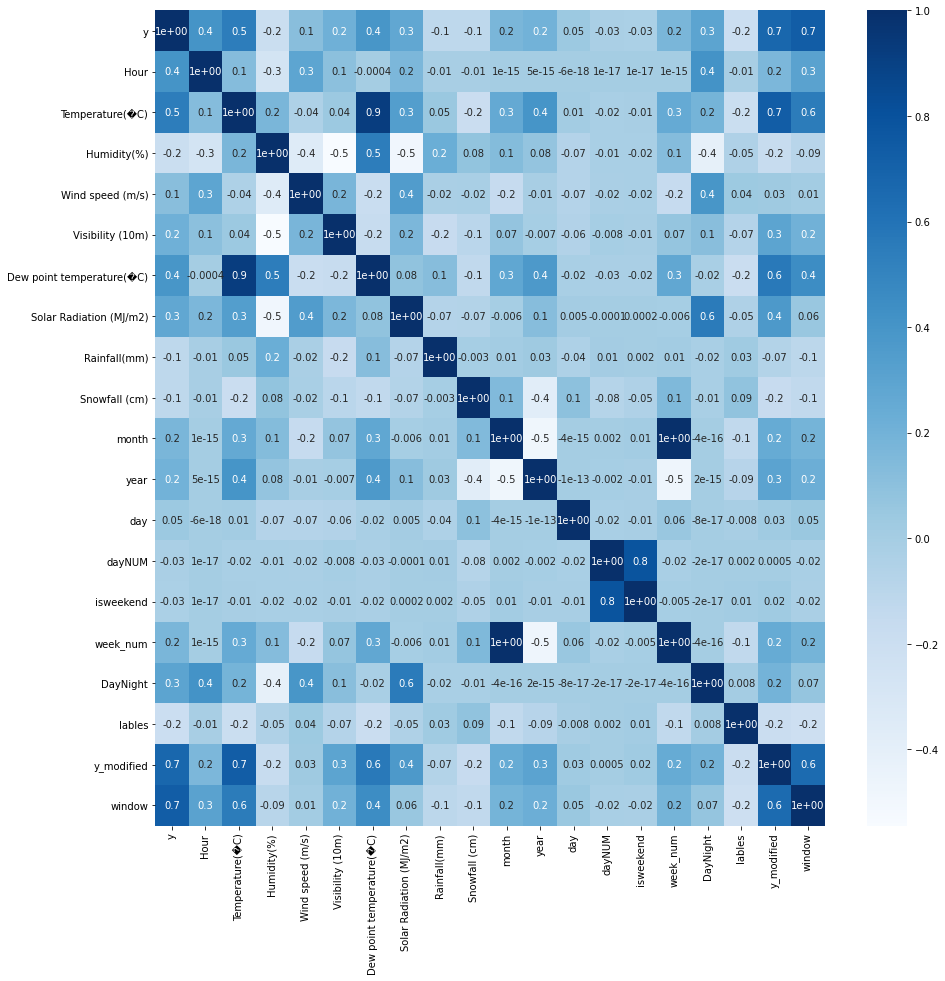

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(data=windowed_train.corr(), annot=True, cmap='Blues' ,  fmt='.1')
plt.show()

# <center> transform categorical columns

In [24]:
enc_train = pd.get_dummies(data = windowed_train)
enc_test = pd.get_dummies(data = windowed_test)

# <center> try diffrent decomposition technique

In [25]:
# from sklearn.decomposition import PCA


# pca = PCA(n_components=4)
# pca.fit(enc_train.drop(['y'] , axis = 1))

# pca_train = pca.transform(enc_train.drop(['y'] , axis = 1))
# pca_test = pca.transform(enc_test)

# pca_train = pd.concat([enc_train , pd.DataFrame(pca_train)] , axis = 1)
# pca_test = pd.concat([enc_test , pd.DataFrame(pca_test).set_index(enc_test.index)] , axis = 1)


In [26]:
# import numpy as np
# from sklearn.manifold import TSNE

# tsen = TSNE(n_components=3)
# tsen_train = tsen.fit_transform(enc_train.drop(['y'] , axis = 1))
# tsen_test = tsen.fit_transform(enc_test)

# tsen_train = pd.concat([enc_train , pd.DataFrame(tsen_train)] , axis = 1)
# tsen_test = pd.concat([enc_test , pd.DataFrame(tsen_test).set_index(enc_test.index)] , axis = 1)


In [27]:

# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# clf = LinearDiscriminantAnalysis()
# clf.fit( enc_train.drop(['y'] , axis = 1), np.round(enc_train['y']).astype(int))

# LDA_train = clf.predict(enc_train.drop(['y'] , axis = 1))
# LDA_test  = clf.predict(enc_test)

# LDA_train = pd.concat([enc_train , pd.DataFrame(LDA_train)] , axis = 1)
# LDA_test = pd.concat([enc_test , pd.DataFrame(LDA_test).set_index(enc_test.index)] , axis = 1)

In [28]:
# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
# svd.fit( enc_train.drop(['y'] , axis = 1))

# svd_train = svd.transform(enc_train.drop(['y'] , axis = 1))
# svd_test  = svd.transform(enc_test)

# svd_train = pd.concat([enc_train , pd.DataFrame(svd_train)] , axis = 1)
# svd_test  = pd.concat([enc_test , pd.DataFrame(svd_test).set_index(enc_test.index)] , axis = 1)

# <center> drop columns that make score worse

In [29]:
droped = ['isweekend' ,'DayNight','Dew point temperature(�C)','day','Wind speed (m/s)','Seasons_Spring','Seasons_Summer','Seasons_Winter','lables','window','y_modified']

In [30]:
# final_train , final_test = svd_train  , svd_test
# final_train , final_test = LDA_train  , LDA_test
# final_train , final_test = tsen_train , tsen_test
# final_train , final_test = pca_train  , pca_test
final_train , final_test = enc_train  , enc_test

# <center> generate calculated column from existing one

In [31]:
final_train['all'] = final_train['Holiday_Holiday']+final_train['Holiday_No Holiday']+final_train['Functioning Day_No']+final_train['Functioning Day_Yes']
final_test ['all'] = final_test ['Holiday_Holiday']+final_test ['Holiday_No Holiday']+final_test ['Functioning Day_No']+final_test ['Functioning Day_Yes']

final_train['weather'] = (0.65*final_train['Solar Radiation (MJ/m2)']+0.66*final_train['Rainfall(mm)']+final_train['Snowfall (cm)'])
final_test ['weather'] = (0.63*final_test ['Solar Radiation (MJ/m2)']+0.64*final_test ['Rainfall(mm)']+final_test ['Snowfall (cm)'])

In [32]:
final_train['Shifted_temp']=final_train['Temperature(�C)'].shift(-1)
final_train['Rainfall(mm)']=final_train['Rainfall(mm)'].shift(-1)

final_test['Shifted_temp']=final_test['Temperature(�C)'].shift(-1)
final_test['Rainfall(mm)']=final_test['Rainfall(mm)'].shift(-1)

# <center> make custom scoring function to use with cross validation

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer

def my_custom_loss_func(y_true, y_pred):
    diff = np.sqrt(mean_squared_log_error(y_true , abs(y_pred)))
    return diff

score = make_scorer(my_custom_loss_func, greater_is_better=False)

# <center> split X , y from train set

In [34]:
X = final_train.drop(['y'] + droped , axis = 1)
y = np.log(final_train['y'] + 1)

In [35]:
lt     = final_test.drop(droped , axis = 1)

In [36]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(random_state=0)
X=qt.fit_transform(X)
X_test=qt.fit_transform(lt)


# <center> fit with cat boost regression model

In [37]:
from catboost import CatBoostRegressor
catbmodel = CatBoostRegressor(
    iterations          = 6575,
    learning_rate       = 0.05,
    loss_function       = "RMSE",
    random_state        = 42,
    verbose             = 0,
    bootstrap_type      = "Bayesian",
    bagging_temperature = 0.2,
    depth               = 2,
    l2_leaf_reg         = 1,
).fit( X , y )

In [38]:
scores = -1 * cross_val_score(catbmodel, X, y, cv=5, scoring = score)
scores.mean()

0.09882403428141955

# <center> fit with xgboost regression model

In [39]:
import xgboost as xgb
from sklearn.ensemble import BaggingRegressor
xg_reg = BaggingRegressor(
    base_estimator = xgb.XGBRegressor(colsample_bytree = 0.9, learning_rate = 0.15, max_depth = 3,  n_estimators =500),                    
    n_estimators = 4, 
    random_state = 0
).fit(X , y)

In [40]:
scores = -1 * cross_val_score(xg_reg, X, y, cv=5, scoring = score)
scores.mean()

0.09306299909927358

In [41]:
y_out3 = np.fix(np.exp(xg_reg.predict(X_test)) - 1)

In [42]:
output = pd.DataFrame({'ID': raw_test.index,'y': y_out3})
output.to_csv('submission.csv', index=False)
output

,ID,y
0,5760,137.0
1,5761,130.0
2,5762,96.0
3,5763,64.0
4,5764,46.0
...,...,...
2995,8755,871.0
2996,8756,801.0
2997,8757,748.0
2998,8758,671.0


# <center> get the weighted sum value of the 2 models

In [43]:
# lt     = final_test.drop(droped , axis = 1)
# fi     = np.fix((0.41*(np.exp(catbmodel.predict(lt))) - 1)+(0.56*(np.exp(xg_reg.predict(lt))) - 1))
# output = pd.DataFrame({'ID': raw_test.index,'y': fi})
# output.to_csv('submission.csv', index=False)
# output